In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (as you've already done)
import pandas as pd
data = pd.read_csv(r'D:\research project\Hyperspectral_data_millets_11_varieties.csv')

# 1. Separate features (X) and target (y)
X = data.drop(columns=['Samples', 'Carbohydrate'])  # Features: hyperspectral data
y = data['Carbohydrate']  # Target: Carbohydrate values

# 2. Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the data (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVR model (we'll use the 'rbf' kernel, but you can try 'linear' or 'poly')
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)  # 'rbf' kernel for non-linear regression
svr_model.fit(X_train_scaled, y_train)

# 5. Make predictions on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_svr})
print(comparison_df)

# 6. Evaluate the model performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"R2 Score: {r2_svr}")


     Actual  Predicted
0     73.73  70.878576
1     73.73  70.728279
2     73.73  70.961158
3     71.92  71.525862
4     67.41  67.760771
..      ...        ...
259   67.81  72.170922
260   67.81  71.036219
261   71.52  70.669851
262   70.92  71.966693
263   69.84  69.120507

[264 rows x 2 columns]
Mean Squared Error (MSE): 12.428822059479657
R² Score: 0.3756172519001091


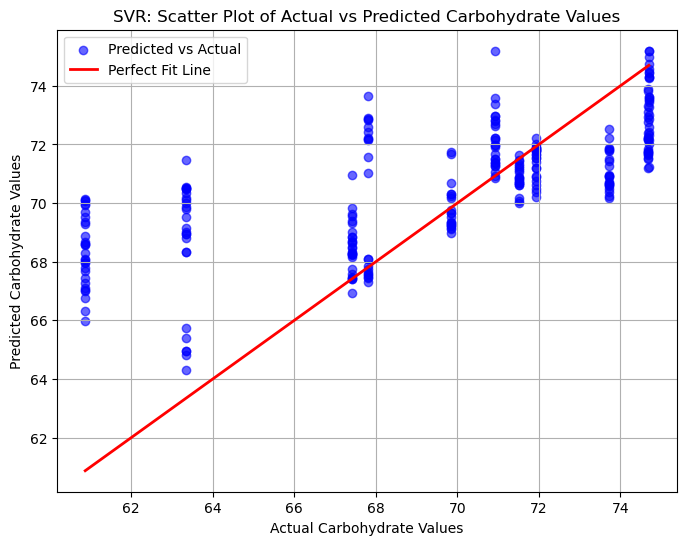

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit Line')
plt.xlabel('Actual Carbohydrate Values')
plt.ylabel('Predicted Carbohydrate Values')
plt.title('SVR: Scatter Plot of Actual vs Predicted Carbohydrate Values')
plt.legend()
plt.grid(True)
plt.show()

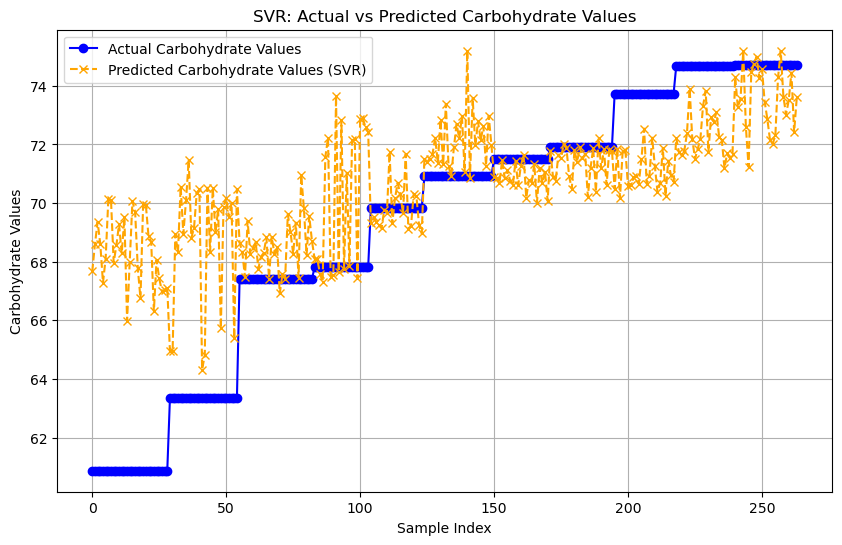

In [7]:
y_test_sorted_idx = y_test.argsort()
y_test_sorted = y_test.iloc[y_test_sorted_idx].reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred_svr).iloc[y_test_sorted_idx].reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Carbohydrate Values', color='blue', marker='o')
plt.plot(y_pred_sorted, label='Predicted Carbohydrate Values (SVR)', color='orange', linestyle='dashed', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Carbohydrate Values')
plt.title('SVR: Actual vs Predicted Carbohydrate Values')
plt.legend()
plt.grid(True)
plt.show()